# Notebook testing plots AMPS plots

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

import gcsfs
from tqdm import tqdm
import fsspec
xr.set_options(display_style="html");

### setup runtime parameters

In [3]:
pattern = 'gs://ldeo-glaciology/AMPS/WRF_24/domain_03/wrf-20161225*'

### list the netcdf files

In [4]:
fs = gcsfs.GCSFileSystem(project='ldeo-glaciology', mode='ab', cache_timeout = 0)
NCs = fs.glob(pattern)
print(f"Total of {len(NCs)} wrf files.")
print(NCs[0])

Total of 8 wrf files.
ldeo-glaciology/AMPS/WRF_24/domain_03/wrf-2016122500_f003-cf.nc


In [8]:
## load the first file to inialize the xarray

url = 'gs://' + NCs[0]
with  fsspec.open(url, mode='rb')  as openfile:  
    ds = xr.open_dataset(openfile, chunks={'time': 1})  # these chunk sizes produce chunks of reasonable data volumes and which stretch through all time

# ## load the other files, each time concaternating them onto an xarray (AMPS) that grows in the time dimension each iteration. 
# for i in tqdm(range(1, len(NCs)-1)):  
#     url = 'gs://' + NCs[i]
#     with  fsspec.open(url, mode='rb')  as openfile:  
#         temp = xr.open_dataset(openfile, chunks={'time': 1})  # these chunk sizes produce chunks of reasonable data volumes and which stretch through all time
#     ds = xr.concat([ds,temp],'time')

In [9]:
ds

<xarray.Dataset>
Dimensions:   (pressure: 5, south_north: 825, time: 1, west_east: 537)
Coordinates:
  * time      (time) datetime64[ns] 2016-12-25T03:00:00
  * pressure  (pressure) float32 1000.0 850.0 700.0 500.0 300.0
    lat       (south_north, west_east) float32 dask.array<chunksize=(825, 537), meta=np.ndarray>
    lon       (south_north, west_east) float32 dask.array<chunksize=(825, 537), meta=np.ndarray>
Dimensions without coordinates: south_north, west_east
Data variables:
    DateTime  (time) int32 dask.array<chunksize=(1,), meta=np.ndarray>
    year      (time) int32 dask.array<chunksize=(1,), meta=np.ndarray>
    month     (time) int32 dask.array<chunksize=(1,), meta=np.ndarray>
    day       (time) int32 dask.array<chunksize=(1,), meta=np.ndarray>
    hour      (time) int32 dask.array<chunksize=(1,), meta=np.ndarray>
    minute    (time) int32 dask.array<chunksize=(1,), meta=np.ndarray>
    Z_sfc     (south_north, west_east) float32 dask.array<chunksize=(825, 537), meta=np.ndarray>
    SST       (time, south_north, west_east) float32 dask.array<chunksize=(1, 825, 537), meta=np.ndarray>
    T_sfc     (time, south_north, west_east) float32 dask.array<chunksize=(1, 825, 537), meta=np.ndarray>
    p_sfc     (time, south_north, west_east) float32 dask.array<chunksize=(1, 825, 537), meta=np.ndarray>
    slp       (time, south_north, west_east) float32 dask.array<chunksize=(1, 825, 537), meta=np.ndarray>
    T_2m      (time, south_north, west_east) float32 dask.array<chunksize=(1, 825, 537), meta=np.ndarray>
    Td_2m     (time, south_north, west_east) float32 dask.array<chunksize=(1, 825, 537), meta=np.ndarray>
    r_v_2m    (time, south_north, west_east) float32 dask.array<chunksize=(1, 825, 537), meta=np.ndarray>
    q_2m      (time, south_north, west_east) float32 dask.array<chunksize=(1, 825, 537), meta=np.ndarray>
    rh_2m     (time, south_north, west_east) float32 dask.array<chunksize=(1, 825, 537), meta=np.ndarray>
    u_10m_tr  (time, south_north, west_east) float32 dask.array<chunksize=(1, 825, 537), meta=np.ndarray>
    v_10m_tr  (time, south_north, west_east) float32 dask.array<chunksize=(1, 825, 537), meta=np.ndarray>
    ws_10m    (time, south_north, west_east) float32 dask.array<chunksize=(1, 825, 537), meta=np.ndarray>
    wd_10m    (time, south_north, west_east) float32 dask.array<chunksize=(1, 825, 537), meta=np.ndarray>
    precip_g  (time, south_north, west_east) float32 dask.array<chunksize=(1, 825, 537), meta=np.ndarray>
    Z_p       (time, pressure, south_north, west_east) float32 dask.array<chunksize=(1, 5, 825, 537), meta=np.ndarray>
    T_p       (time, pressure, south_north, west_east) float32 dask.array<chunksize=(1, 5, 825, 537), meta=np.ndarray>
    Td_p      (time, pressure, south_north, west_east) float32 dask.array<chunksize=(1, 5, 825, 537), meta=np.ndarray>
    r_v_p     (time, pressure, south_north, west_east) float32 dask.array<chunksize=(1, 5, 825, 537), meta=np.ndarray>
    q_p       (time, pressure, south_north, west_east) float32 dask.array<chunksize=(1, 5, 825, 537), meta=np.ndarray>
    SW_d      (time, south_north, west_east) float32 dask.array<chunksize=(1, 825, 537), meta=np.ndarray>
    LW_d      (time, south_north, west_east) float32 dask.array<chunksize=(1, 825, 537), meta=np.ndarray>
    LW_u      (time, south_north, west_east) float32 dask.array<chunksize=(1, 825, 537), meta=np.ndarray>
    LW_d_acc  (time, south_north, west_east) float32 dask.array<chunksize=(1, 825, 537), meta=np.ndarray>
    LW_u_acc  (time, south_north, west_east) float32 dask.array<chunksize=(1, 825, 537), meta=np.ndarray>
    albedo    (time, south_north, west_east) float32 dask.array<chunksize=(1, 825, 537), meta=np.ndarray>
    SH        (time, south_north, west_east) float32 dask.array<chunksize=(1, 825, 537), meta=np.ndarray>
    LH        (time, south_north, west_east) float32 dask.array<chunksize=(1, 825, 537), meta=np.ndarray>
    SH_acc    (time, south_north, west_east) float32 dask.array<

In [10]:
print(ds.T_sfc.chunks)

((1,), (825,), (537,))


## Quick overview plot

In [11]:
# plottime = 0

# if plottime == 0:
#     plottitle = 'hi'
#     plotdate = '23-Dec-2016 1800z'
# else:
#     plottitle = 'lo'
#     plotdate = '27-Dec-2016 1500z'
    

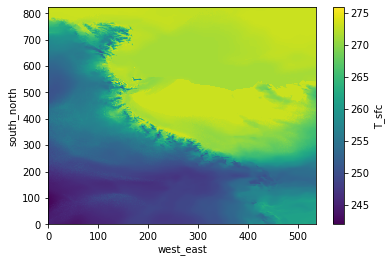

In [12]:
ds['T_sfc'].mean(dim='time').plot()

### Zoom in to Scott and Amundsen

In [13]:
scott = (-154.2, -85.3)
amundsen = (-159.6, -85.4)

In [14]:
def get_closest_AMPS_cell(file_for_latlon, lat, lon):
    """
    SSIA
    :param file_for_latlon:
    :param lat:
    :param lon:
    :return:
    """
    LAT = file_for_latlon.variables['lat'][:]
    LON = file_for_latlon.variables['lon'][:]
    a = abs(LON - lon) + abs(LAT - lat)
    iii, jjj = np.unravel_index(np.argmin(a.data), a.shape)
    return iii, jjj

si, sj = get_closest_AMPS_cell(ds, scott[1], scott[0])
ai, aj = get_closest_AMPS_cell(ds, amundsen[1], amundsen[0])

print(f"Closest AMPS gridcell for Scott Gl. is {ds['lat'].values[si, sj]:1.2f} N, {ds['lon'].values[si, sj]:1.2f} E")

Closest AMPS gridcell for Scott Gl. is -85.33 N, -154.17 E


/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:30: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:37: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
/srv/conda/envs/notebook/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  inframe=inframe)


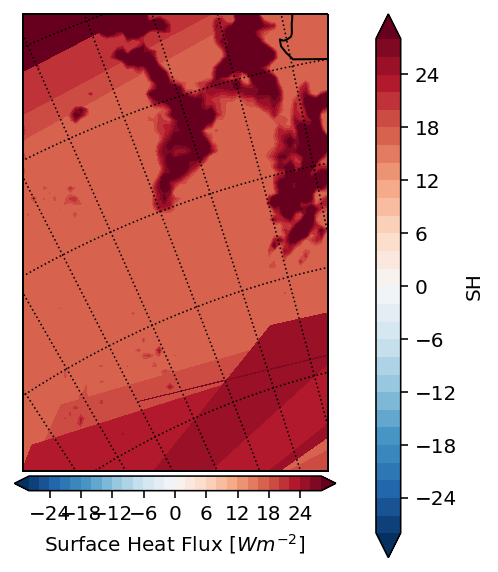

In [15]:
## THIS NEEDS cartopy 0.18 but can't install it for some reason...

import shapely.geometry as sgeom
import cartopy.crs as ccrs


box = sgeom.box(minx=155, maxx=165, miny=-83, maxy=-85.5)
x0, y0, x1, y1 = box.bounds
myproj = ccrs.SouthPolarStereo(central_longitude=180)
# myproj = ccrs.Orthographic()

plt.figure(figsize=(4, 5), facecolor='white', dpi=144)
ax = plt.axes(projection=myproj)
ax.set_extent([x0, x1, y0, y1], ccrs.PlateCarree())  
ax.coastlines('50m')
# ax.stock_img()

# pcm1 = ax.pcolormesh(ds.lon, ds.lat, ds['SH'].mean(dim='time'),\
#                     vmin=-30, vmax=30,\
#                     transform=ccrs.PlateCarree())#, cmap=plt.get_cmap("BuPu")
## Alternative
kwargs = dict(x='lon', y='lat', ax=ax, transform=ccrs.PlateCarree())
pcm1 = ds['SH'].mean(dim='time').plot.contourf(
    levels=31, robust=True,  **kwargs)


# c = plt.colorbar(orientation='vertical', shrink=0.4, pad=0.10)
cb1 = plt.colorbar(pcm1, ax=ax, label=r'Surface Heat Flux $[W {m^{-2}}]$', \
                   orientation='horizontal', extend='both', \
                  shrink=0.9, pad=0.01)
ax.plot(ds.lon[si, sj], ds.lat[si, sj], 'ko', markersize=3, transform=ccrs.PlateCarree())
ax.plot(ds.lon[ai, aj], ds.lat[ai, aj], 'ko', markersize=3, transform=ccrs.PlateCarree())
# ax.plot(LON[ssj, ssi], LAT[ssj, ssi], 'ko', markersize=2, transform=ccrs.PlateCarree())

ax.gridlines(color="black", linestyle="dotted")
# plt.suptitle('LH')
plt.tight_layout()
# plt.savefig('figs/mapplot_TNB_Fsfc_mean.png')
plt.show()

ImportError: Plotting of arrays of cftime.datetime objects or arrays indexed by cftime.datetime objects requires the optional `nc-time-axis` (v1.2.0 or later) package.

/srv/conda/envs/notebook/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  inframe=inframe)


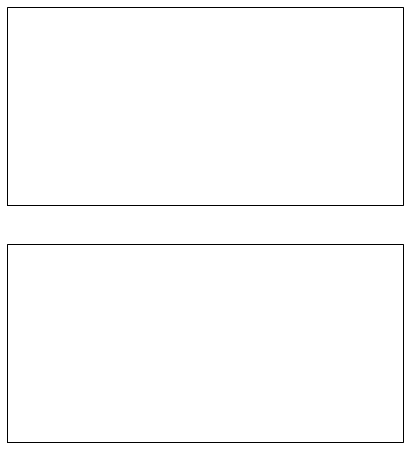

In [16]:
ds_map = ds.sel(
  time='2016-12-25',
  method='nearest'
).sel(south_north=slice(-90,-50), west_east=slice(-150,-170)).mean(dim='time').squeeze()

import cartopy.crs as ccrs
import matplotlib.path as mpath
import cartopy.feature as cfeature

fig, axarr = plt.subplots(nrows=2,
                          figsize=[18,8],
                          subplot_kw={'projection':ccrs.PlateCarree(200)}
                         )

for ax, var, cmap in zip(
  axarr.flat,
  ['SH', 'T_sfc'],
  ['RdBu', 'RdBu']  # [cmo.haline, cmo.matter]
):
    
    if var == 'SH':
        vmin = -20
        vmax = 20
    else:
        vmin = None
        vmax = None
    
    kwargs = dict(ax=ax, transform=ccrs.PlateCarree()) ## x='west_east', y='south_north', 
    
    ds_map[var].plot.contourf(
        levels=31, robust=True, cmap=cmap, vmin=vmin, vmax=vmax,  **kwargs
    )
ax.set_title('')
ax.add_feature(cfeature.LAND, edgecolor='0.3')

### Bot method

In [17]:
central_lon = ds.lon.mean().values.item()
central_lat = ds.lat.mean().values.item()

lon_min = ds.lon.min().values.item()
lon_max = ds.lon.max().values.item()
lon_range = lon_max - lon_min

lat_min = ds.lat.min().values.item()
lat_max = ds.lat.max().values.item()
lat_range = lat_max - lat_min

proj = ccrs.Orthographic(central_longitude=central_lon,
                         central_latitude=central_lat)

date_str = np.datetime_as_string(ds.time.values, timezone='UTC', unit='m')

location = f'{central_lon:3.1f}, {central_lat:3.1f} | {date_str}'
print(location)

-1.5, -79.6 | ['2016-12-25T03:00Z']


In [18]:
# tiles near equator are square
# towards pole, both dimensions contract
scale_lon = 2 + 0.75 * abs(np.deg2rad(central_lat))
scale_lat = 2 + 0.3 * abs(np.deg2rad(central_lat))

print(scale_lon, scale_lat)

extent = [central_lon - lon_range/scale_lon, central_lon + lon_range/scale_lon,
          central_lat - lat_range/scale_lat, central_lat + lat_range/scale_lat]

3.041872760334066 2.4167491041336264


TypeError: _pcolorargs() got an unexpected keyword argument 'allmatch'

/srv/conda/envs/notebook/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  inframe=inframe)


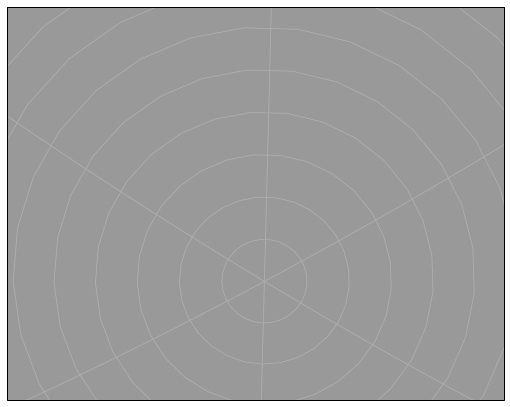

In [19]:
import cmocean
plt.rcParams['font.size'] = 16

def plot(da, clip_extent=True, **kwargs):
    xdim = 'XC' if 'i' in da.dims else 'lon'
    ydim = 'YC' if 'j' in da.dims else 'lat'
    
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_axes([0, 0.02, 1, 0.91],
                      projection=ccrs.Orthographic(central_lon, central_lat))
    ax.background_patch.set_facecolor('0.6')
    if clip_extent:
        ax.set_extent(extent, crs=ccrs.PlateCarree())
    gl = ax.gridlines()
    
    da.plot(ax=ax, x=xdim, y=ydim, transform=ccrs.PlateCarree(), **kwargs)
    ax.set_title(f'LLC4320 {da.long_name} | {location}')
    
#     logo_axis = fig.add_axes([0.81, 0.017, 0.12, 0.05])
#     fig.text(0.815, 0.1, f'© Ryan Abernathey\n{year} CC BY',
#              fontdict={'size': 11})
#     logo_axis.imshow(logo_img, interpolation='hanning')
#     logo_axis.axis('off')

plot(ds.SST.mean('time'), center=False, robust=True, # cmap=cmocean.cm.thermal,
     cbar_kwargs={'shrink': 0.5})

## PLOT timeseries of 10m wind speeds 

In [23]:
print(ds.lon.shape)
print(ds.lat.shape)
print(ds['ws_10m'].isel(time=0).shape)

(825, 537)
(825, 537)
(825, 537)


### Get indices for Scott and Amundsen Glaciers

method 1 - mininmum distance search

method 2 - xarray labeled coordinates

In [24]:
# # rotate winds to earth-relative using the correct formulas
# ds['ue'] = ds['U10'] * ds['COSALPHA'] - ds['V10'] * ds['SINALPHA']
# ds['ve'] = ds['V10'] * ds['COSALPHA'] + ds['U10'] * ds['SINALPHA']

Crude method using indices

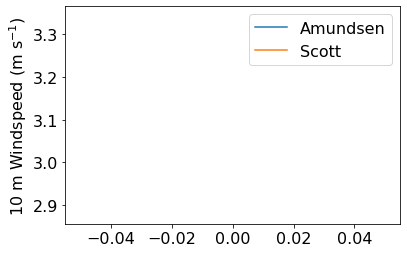

In [25]:
plt.plot(ds['ws_10m'].isel(south_north=ai, west_east=aj), label='Amundsen')
plt.plot(ds['ws_10m'].isel(south_north=si, west_east=sj), label='Scott')
plt.ylabel('10 m Windspeed (m s$^{-1}$)')
plt.legend()
# plt.savefig('figs/lineplot_WHAFT_ScottAmundsen_WS10_' + plottitle + '.pdf')

Better? method using labeled coordinates

### PLOT timeseries of other surface terms

In [26]:
print(ds['ws_10m'].isel(south_north=si, west_east=sj).argmax())
print(ds['time'].values[0])
print(ds['ws_10m'].isel(south_north=si, west_east=sj).argmin())
print(ds['time'].values[4])

<xarray.DataArray 'ws_10m' ()>
dask.array<nanarg_agg-aggregate, shape=(), dtype=int64, chunksize=(), chunktype=numpy.ndarray>
Coordinates:
    lat      float32 dask.array<chunksize=(), meta=np.ndarray>
    lon      float32 dask.array<chunksize=(), meta=np.ndarray>
2016-12-25T03:00:00.000000000
<xarray.DataArray 'ws_10m' ()>
dask.array<nanarg_agg-aggregate, shape=(), dtype=int64, chunksize=(), chunktype=numpy.ndarray>
Coordinates:
    lat      float32 dask.array<chunksize=(), meta=np.ndarray>
    lon      float32 dask.array<chunksize=(), meta=np.ndarray>


IndexError: index 4 is out of bounds for axis 0 with size 1

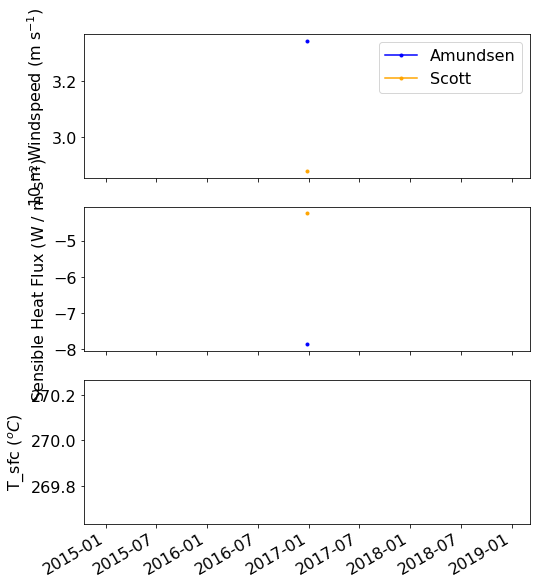

In [27]:
fig, axes = plt.subplots(3, 1, figsize=(8,10), sharex=True, sharey=False)
ln01 = axes[0].plot(ds['time'], ds['ws_10m'].isel(south_north=ai, west_east=aj), 
                     marker='.', color='blue', label='Amundsen')
ln02 = axes[0].plot(ds['time'], ds['ws_10m'].isel(south_north=si, west_east=sj), 
                    marker='.', color='orange', label='Scott')
ln11 = axes[1].plot(ds['time'], ds['SH'].isel(south_north=ai, west_east=aj), 
                   marker='.', color='blue')
ln12 = axes[1].plot(ds['time'], ds['SH'].isel(south_north=si, west_east=sj), 
                   marker='.', color='orange')
# ln13 = axes[1].plot(ds['time'], ds['LW_d'].isel(south_north=ai, west_east=aj), 
#                    color='blue')
# ln14 = axes[1].plot(ds['time'], ds['LW_d'].isel(south_north=si, west_east=sj), 
#                     color='orange')
ln21 = axes[2].plot(ds['time'], ds['T_sfc'].isel(south_north=ai, west_east=aj), 
                   color='blue')
ln21 = axes[2].plot(ds['time'], ds['T_sfc'].isel(south_north=si, west_east=sj), 
                    color='orange')

axes[0].set_ylabel('10 m Windspeed (m s$^{-1}$)')
axes[1].set_ylabel('Sensible Heat Flux (W / m s$^{-2}$)')
axes[2].set_ylabel('T_sfc ($^{o}C$)')
axes[0].legend()
# plt.xlim(pd.Timestamp('2017-02-10'), pd.Timestamp('2017-02-17'))
fig.autofmt_xdate()
# plt.savefig('figs/lineplot_WHAFT_ScottAmundsen_WS10_' + plottitle + '.pdf')

In [ ]:
## Currently can't do this with 2D coordinates
# ds = ds.set_index(south_north='lat')
# ds = ds.set_index(west_east='lon')
# ds.sel(west_east=scott[1], south_north=scott[0], method='nearest')[u'T_sfc'].plot()

### PLOT vertical profile of winds

/srv/conda/envs/notebook/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/srv/conda/envs/notebook/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/srv/conda/envs/notebook/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/srv/conda/envs/notebook/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


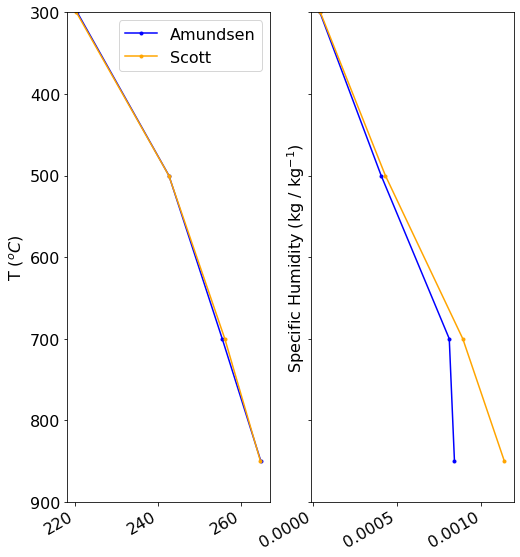

In [28]:

fig, axes = plt.subplots(1, 2, figsize=(8,10), sharex=False, sharey=True)
ln01 = axes[0].plot(ds['T_p'].isel(south_north=ai, west_east=aj).mean('time'), ds['pressure'],
                    marker='.', color='blue', label='Amundsen')
ln02 = axes[0].plot(ds['T_p'].isel(south_north=si, west_east=sj).mean('time'), ds['pressure'],
                    marker='.', color='orange', label='Scott')
ln11 = axes[1].plot(ds['q_p'].isel(south_north=ai, west_east=aj).mean('time'), ds['pressure'], 
                   marker='.', color='blue')
ln12 = axes[1].plot(ds['q_p'].isel(south_north=si, west_east=sj).mean('time'), ds['pressure'], 
                   marker='.', color='orange')

axes[0].set_ylabel('T ($^{o}C$)')
axes[1].set_ylabel('Specific Humidity (kg / kg$^{-1}$)')
axes[0].legend()
plt.ylim([900, 300])
fig.autofmt_xdate()
# plt.savefig('figs/lineplot_WHAFT_ScottAmundsen_WS10_' + plottitle + '.pdf')